<a href="https://colab.research.google.com/github/sidduvijetha/demo/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis
using TextBlob

**Data preprocessing steps**

1.  Cleaning the text
1.  Tokenization
2.  Enrichment - POS tagging
1.  Stopwords removal
2. Obtaining the stem words










Importing dataset

In [2]:
import pandas as pd
url='https://raw.githubusercontent.com/sidduvijetha/sentiment-analysis/main/train_dta.csv'
df = pd.read_csv(url)
df.head()

,id,tweet
0,1,@user when a father is dysfunctional and is s...
1,2,@user @user thanks for #lyft credit i can't us...
2,3,bihday your majesty
3,4,#model i love u take with u all the time in ...
4,5,factsguide: society now #motivation


Step 1: Cleaning the text

In [3]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the tweet column
df['Cleaned Reviews'] = df['tweet'].apply(clean)
df.head()

,id,tweet,Cleaned Reviews
0,1,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use ...
2,3,bihday your majesty,bihday your majesty
3,4,#model i love u take with u all the time in ...,model i love u take with u all the time in ur
4,5,factsguide: society now #motivation,factsguide society now motivation


Steps 2-4: Tokenization, POS tagging, stopwords removal

In [6]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,tweet,Cleaned Reviews,POS tagged
0,1,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[(user, n), (father, n), (dysfunctional, a), (..."
1,2,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use ...,"[(user, r), (user, a), (thanks, n), (lyft, a),..."
2,3,bihday your majesty,bihday your majesty,"[(bihday, r), (majesty, n)]"
3,4,#model i love u take with u all the time in ...,model i love u take with u all the time in ur,"[(model, n), (love, v), (u, a), (take, n), (u,..."
4,5,factsguide: society now #motivation,factsguide society now motivation,"[(factsguide, a), (society, n), (motivation, n)]"


In [ ]:
nltk.download()

Step 5: Obtaining the stem words

In [7]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,id,tweet,Cleaned Reviews,POS tagged,Lemma
0,1,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...,"[(user, n), (father, n), (dysfunctional, a), (...",user father dysfunctional selfish drag kid d...
1,2,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can t use ...,"[(user, r), (user, a), (thanks, n), (lyft, a),...",user user thanks lyft credit use cause offer...
2,3,bihday your majesty,bihday your majesty,"[(bihday, r), (majesty, n)]",bihday majesty
3,4,#model i love u take with u all the time in ...,model i love u take with u all the time in ur,"[(model, n), (love, v), (u, a), (take, n), (u,...",model love u take u time ur
4,5,factsguide: society now #motivation,factsguide society now motivation,"[(factsguide, a), (society, n), (motivation, n)]",factsguide society motivation


In [10]:
df[['tweet', 'Lemma']]

,tweet,Lemma
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid d...
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer...
2,bihday your majesty,bihday majesty
3,#model i love u take with u all the time in ...,model love u take u time ur
4,factsguide: society now #motivation,factsguide society motivation
...,...,...
31957,ate @user isz that youuu?ðððððð...,eat user isz youuu
31958,to see nina turner on the airwaves trying to...,see nina turner airwave try wrap mantle genu...
31959,listening to sad songs on a monday morning otw...,listen sad song monday morning otw work sad
31960,"@user #sikh #temple vandalised in in #calgary,...",user sikh temple vandalise calgary wso conde...


Sentiment analysis using TextBlob

In [11]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [13]:
fin_data = pd.DataFrame(df[['tweet', 'Lemma']])

In [14]:
# fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()

,tweet,Lemma,Polarity,Analysis
0,@user when a father is dysfunctional and is s...,user father dysfunctional selfish drag kid d...,-0.3,Negative
1,@user @user thanks for #lyft credit i can't us...,user user thanks lyft credit use cause offer...,0.2,Positive
2,bihday your majesty,bihday majesty,0.0,Neutral
3,#model i love u take with u all the time in ...,model love u take u time ur,0.5,Positive
4,factsguide: society now #motivation,factsguide society motivation,0.0,Neutral


In [15]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    15675
Neutral     11727
Negative     4560
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7fc892e4ab10>,
 [Text(0.03307995522563066, 1.0995024859281903, 'Positive'),
  Text(-0.5062844798640233, -0.9765633750294016, 'Neutral'),
  Text(1.216653138471968, -0.5850257606689729, 'Negative')],
 [Text(0.018043611941253083, 0.5997286286881037, '49.0%'),
  Text(-0.27615517083492175, -0.532670931834219, '36.7%'),
  Text(0.7660408649638317, -0.36834955301379774, '14.3%')])

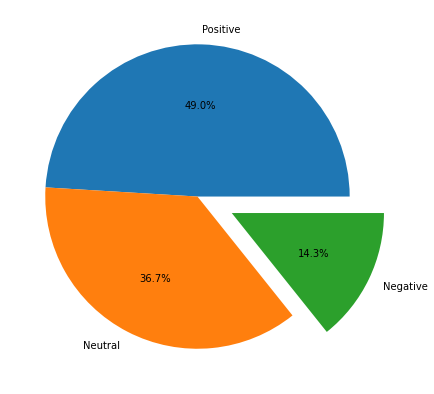

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
# plt.legend()